# Credit Card Lead Prediction

In [2]:
#from xgboost import XGBClassifier

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from category_encoders import LeaveOneOutEncoder
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC


In [4]:
from imblearn.over_sampling import SMOTE

#### Import Data

In [5]:
train_df = pd.read_csv('train5.csv')

test_df = pd.read_csv('test5.csv')

sample_df = pd.read_csv('sample_submission5.csv')

In [6]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 14.1+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.2+ MB


In [9]:
train_df.isna().sum()


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
test_df.isna().sum()


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

### EDA

In [11]:
def normal(col):
    print('No of unique values:\t', train_df[col].nunique())
    print('Values Count:\n', train_df[col].value_counts()) 

In [12]:
train_df.shape

(245725, 11)

In [13]:
train_df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [14]:
normal('Gender')

No of unique values:	 2
Values Count:
 Male      134197
Female    111528
Name: Gender, dtype: int64


In [15]:
normal('Age')

No of unique values:	 63
Values Count:
 28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64


In [16]:
normal('Region_Code')

No of unique values:	 35
Values Count:
 RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64


In [17]:
train_df.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [18]:
normal('Occupation')

No of unique values:	 4
Values Count:
 Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64


In [19]:
train_df['Channel_Code']

0         X3
1         X1
2         X3
3         X1
4         X1
          ..
245720    X3
245721    X1
245722    X1
245723    X1
245724    X1
Name: Channel_Code, Length: 245725, dtype: object

In [20]:
normal('Channel_Code')

No of unique values:	 4
Values Count:
 X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64


In [21]:
train_df['Vintage']

0          43
1          32
2          26
3          19
4          33
         ... 
245720    109
245721     15
245722     13
245723     31
245724     21
Name: Vintage, Length: 245725, dtype: int64

In [22]:
normal('Vintage')

No of unique values:	 66
Values Count:
 13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64


In [23]:
normal('Credit_Product')

No of unique values:	 2
Values Count:
 No     144357
Yes     72043
Name: Credit_Product, dtype: int64


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

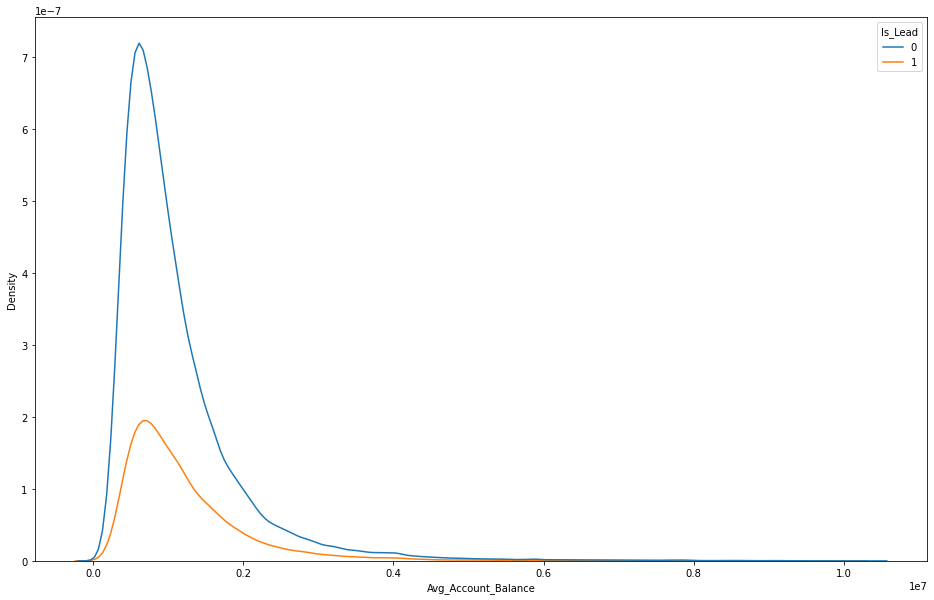

In [24]:
plt.figure(figsize=(16,10))
sns.kdeplot(train_df['Avg_Account_Balance'], hue = train_df['Is_Lead'])

In [25]:
normal('Is_Active')

No of unique values:	 2
Values Count:
 No     150290
Yes     95435
Name: Is_Active, dtype: int64


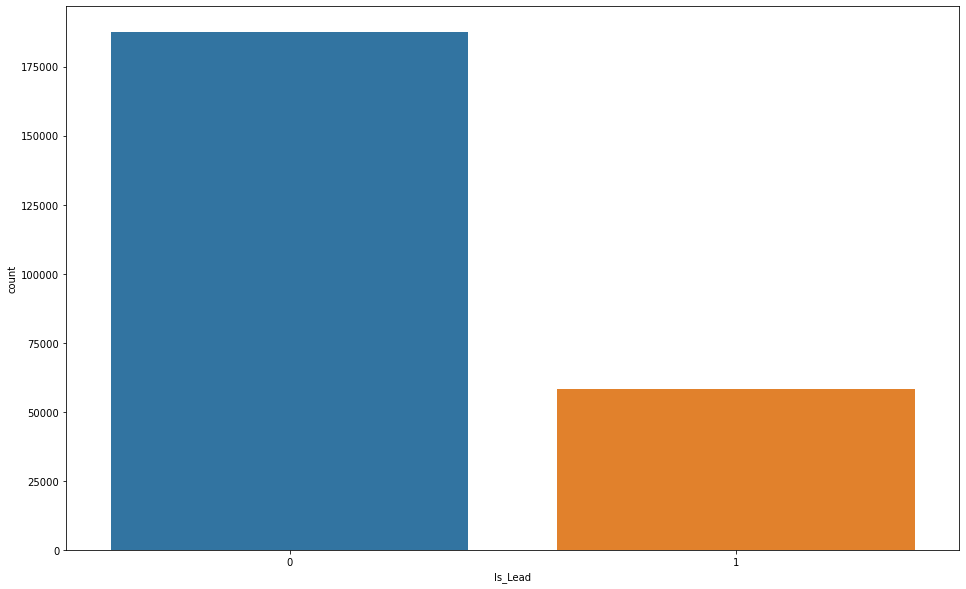

In [26]:
plt.figure(figsize=(16,10))
sns.countplot(x = train_df['Is_Lead']);

<AxesSubplot:xlabel='Gender', ylabel='count'>

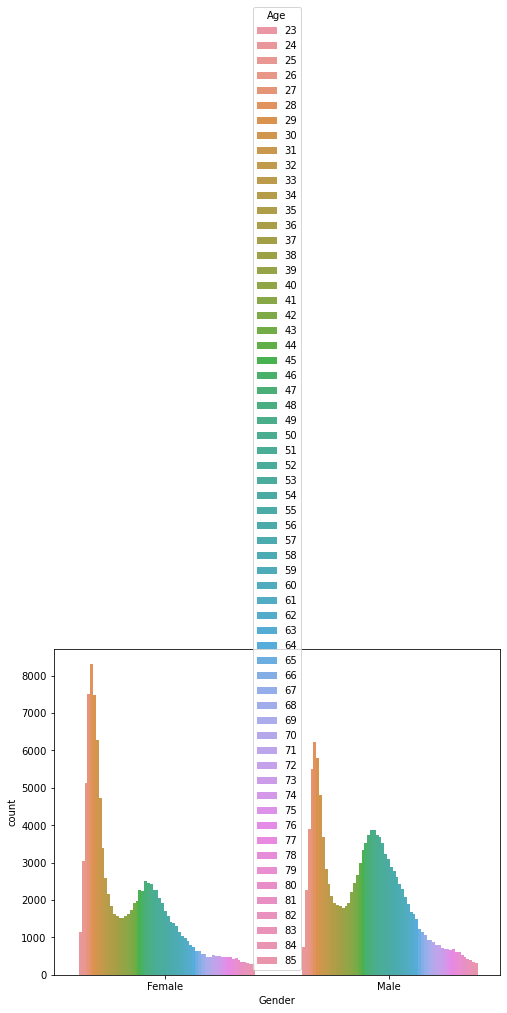

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_df['Gender'], hue=train_df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

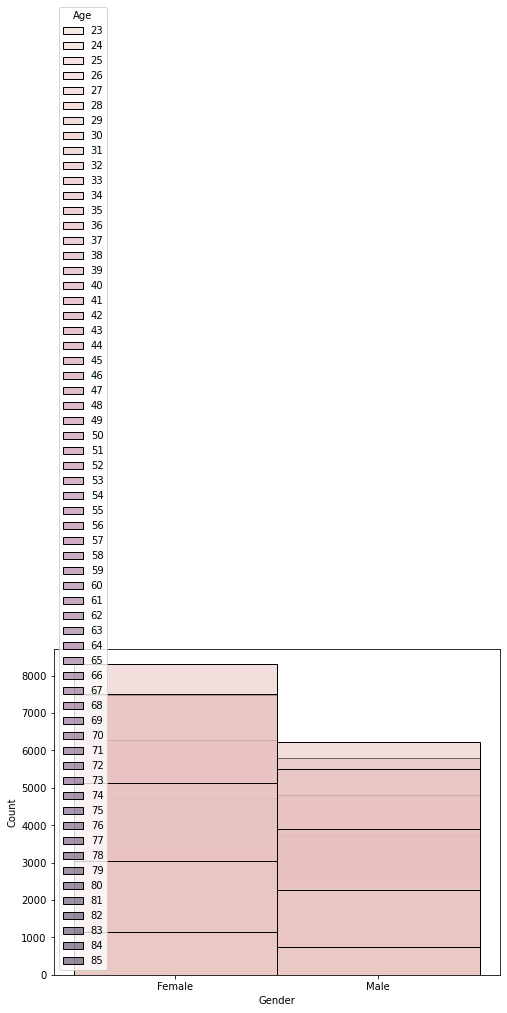

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(x=train_df['Gender'], hue=train_df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

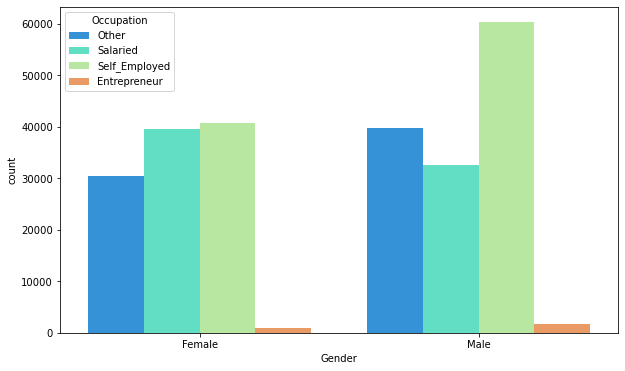

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=train_df['Gender'], hue=train_df['Occupation'], palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='count'>

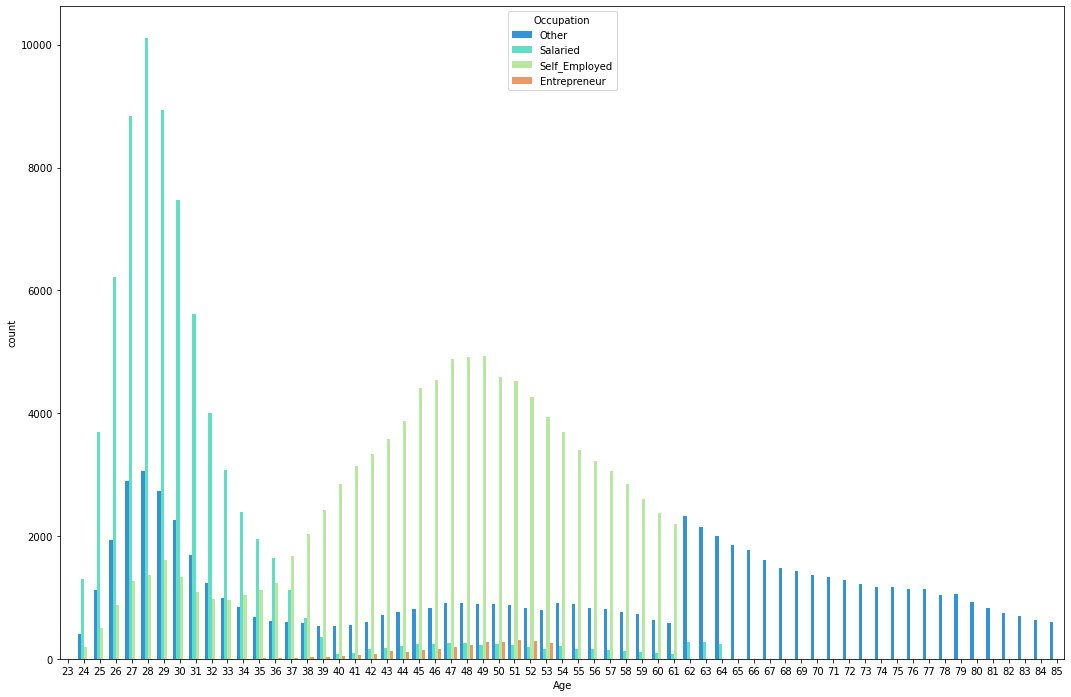

In [30]:
plt.figure(figsize=(18,12))
sns.countplot(x=train_df['Age'], hue=train_df['Occupation'], palette='rainbow')

In [31]:
train_df.Channel_Code.nunique()

4

In [32]:
train_df.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [33]:
normal('Channel_Code')

No of unique values:	 4
Values Count:
 X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64


In [34]:
train_df.Vintage.nunique()

66

In [35]:
train_df.Vintage.value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

In [36]:
normal('Vintage')

No of unique values:	 66
Values Count:
 13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64


In [37]:
train_df.Credit_Product.nunique()

2

In [38]:
train_df.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [39]:
train_df.Credit_Product.isna().sum()

29325

In [40]:
normal('Credit_Product')

No of unique values:	 2
Values Count:
 No     144357
Yes     72043
Name: Credit_Product, dtype: int64


In [41]:
train_df.Avg_Account_Balance.nunique()

135292

In [42]:
train_df.Avg_Account_Balance.value_counts()

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
1016388      1
516680       1
1043017      1
784971       1
2760299      1
Name: Avg_Account_Balance, Length: 135292, dtype: int64

In [43]:
normal('Avg_Account_Balance')

No of unique values:	 135292
Values Count:
 4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
1016388      1
516680       1
1043017      1
784971       1
2760299      1
Name: Avg_Account_Balance, Length: 135292, dtype: int64


In [44]:
train_df.Is_Active.nunique()

2

In [45]:
train_df.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [46]:
normal('Is_Active')

No of unique values:	 2
Values Count:
 No     150290
Yes     95435
Name: Is_Active, dtype: int64


In [47]:
train_df.groupby('Is_Active')['Credit_Product'].value_counts()

Is_Active  Credit_Product
No         No                84768
           Yes               50098
Yes        No                59589
           Yes               21945
Name: Credit_Product, dtype: int64

In [48]:
train_df.groupby('Is_Lead')['Credit_Product'].value_counts()

Is_Lead  Credit_Product
0        No                133734
         Yes                49353
1        Yes                22690
         No                 10623
Name: Credit_Product, dtype: int64

In [49]:
train_df.loc[train_df['Is_Lead']==1, ['Credit_Product']].isna().sum()

Credit_Product    24975
dtype: int64

In [50]:
train_df_new = train_df.copy()

In [51]:
train_df.shape

(245725, 11)

In [52]:
null_index = train_df_new.loc[train_df_new['Credit_Product'].isna()].index

In [53]:
train_df_new['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [54]:
train_df_new.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [55]:
train_df_new.to_csv('preprocessed_data.csv', index = None)

In [56]:
mapper = train_df_new['Is_Lead'].value_counts().to_dict()

In [57]:
train_df_new['Freq'] = train_df_new['Is_Lead'].map(mapper)

In [58]:
train_df_new.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,187437
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,187437
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,187437
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,187437
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,187437


In [59]:
train_data = train_df_new.iloc[:-105312]

train_data.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
140408,GSSETQOR,Female,55,RG262,Self_Employed,X3,56,No,1005700,No,0,187437
140409,WMA9PGM8,Male,38,RG264,Salaried,X1,25,No,428392,No,0,187437
140410,MUUQCQW8,Female,28,RG257,Salaried,X1,19,No,327840,No,0,187437
140411,FTWQBAUC,Female,66,RG251,Other,X3,109,No,375286,Yes,0,187437
140412,WNDAKJB8,Female,51,RG283,Entrepreneur,X3,93,NaN,1071551,Yes,1,58288


In [60]:
test_data = train_df_new.iloc[-105312:]

test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
140413,8WZKHQRT,Male,58,RG269,Self_Employed,X2,19,No,1430541,Yes,0,187437
140414,MCGF7ADS,Male,45,RG284,Self_Employed,X3,45,Yes,1027211,No,0,187437
140415,JSFEGK4T,Female,48,RG269,Self_Employed,X3,19,NaN,701578,Yes,1,58288
140416,O3OMGLSA,Male,61,RG272,Self_Employed,X2,92,NaN,698436,No,0,187437
140417,HKNTFXS7,Female,27,RG256,Salaried,X1,13,No,773516,No,0,187437


In [61]:
X = train_data.iloc[:,1:-2]

X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
140408,Female,55,RG262,Self_Employed,X3,56,No,1005700,No
140409,Male,38,RG264,Salaried,X1,25,No,428392,No
140410,Female,28,RG257,Salaried,X1,19,No,327840,No
140411,Female,66,RG251,Other,X3,109,No,375286,Yes


In [62]:
y = train_data['Is_Lead']

In [63]:
cat_col = X.select_dtypes(object).columns
cat_col

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

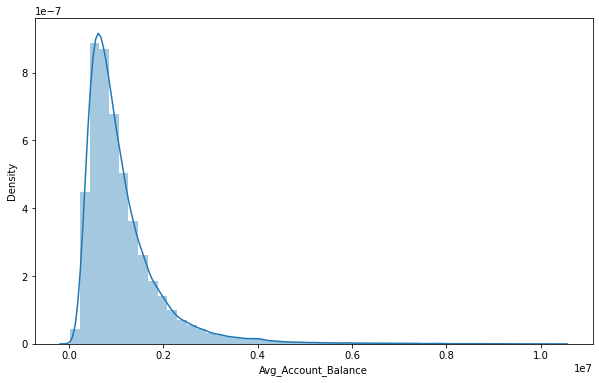

In [64]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['Avg_Account_Balance'])

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

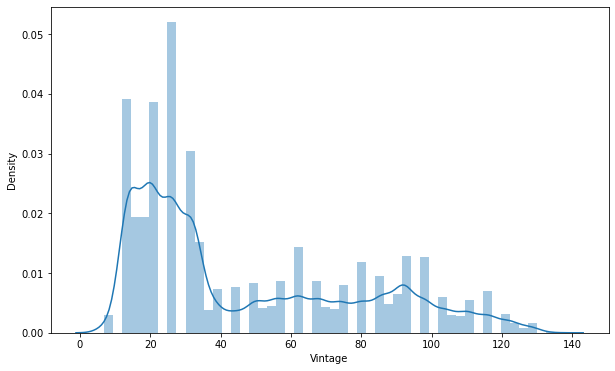

In [65]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['Vintage'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Age'>

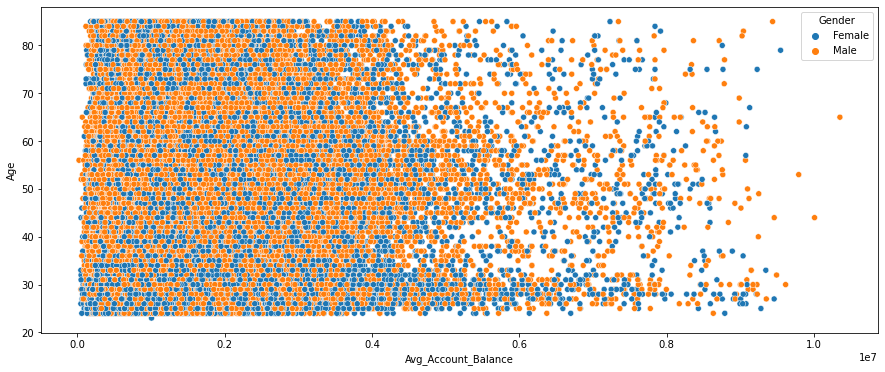

In [66]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = train_df['Avg_Account_Balance'], y = train_df['Age'], hue=train_df['Gender'])

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


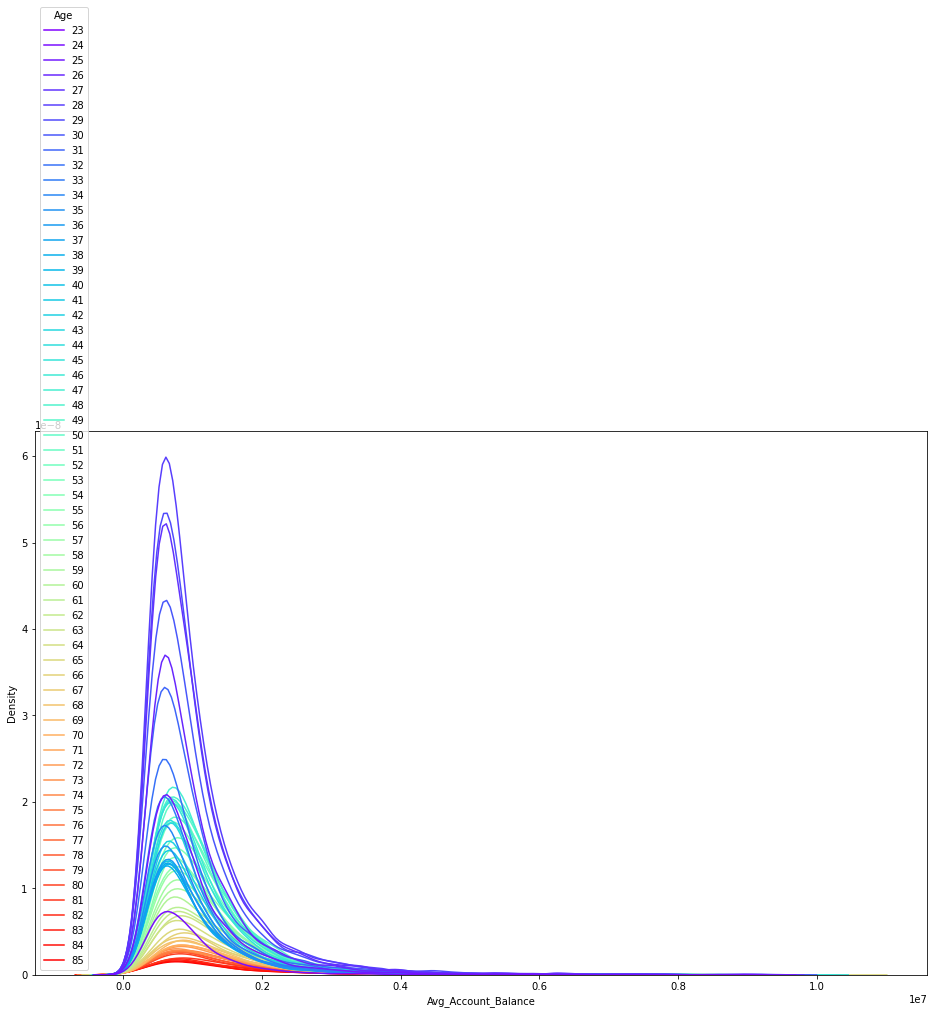

In [67]:
plt.figure(figsize = (16,10))
sns.kdeplot(train_df['Avg_Account_Balance'], hue=train_df['Age'], palette='rainbow');

In [68]:
train_df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [69]:
df = pd.concat([train_df, test_df], axis = 0)

df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0


In [70]:
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [71]:
df[df['Credit_Product'].isna()]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1.0
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1.0
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1.0
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1.0
40,6WX9JDVK,Female,63,RG254,Other,X3,103,NaN,1249319,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...
105260,ZXCWURWZ,Male,45,RG270,Salaried,X3,117,NaN,582015,Yes,NaN
105266,RKSESPFM,Male,46,RG256,Self_Employed,X2,86,NaN,488022,Yes,NaN
105272,EPJEMD9H,Male,48,RG268,Self_Employed,X2,91,NaN,1228271,Yes,NaN
105286,GWVNNKSG,Male,58,RG277,Self_Employed,X3,80,NaN,750421,Yes,NaN


In [72]:
df.loc[df['Credit_Product'].isna(), ['Gender', 'Credit_Product']]

,Gender,Credit_Product
6,Male,NaN
15,Male,NaN
31,Female,NaN
36,Female,NaN
40,Female,NaN
...,...,...
105260,Male,NaN
105266,Male,NaN
105272,Male,NaN
105286,Male,NaN


In [73]:
df.shape

(351037, 11)

In [74]:
df.groupby('Gender')['Credit_Product'].value_counts()/351037

Gender  Credit_Product
Female  No                0.285238
        Yes               0.123377
Male    No                0.301495
        Yes               0.170680
Name: Credit_Product, dtype: float64

In [75]:
df.loc[:,['Gender', 'Credit_Product']]

,Gender,Credit_Product
0,Female,No
1,Female,No
2,Female,No
3,Male,No
4,Female,No
...,...,...
105307,Male,Yes
105308,Male,Yes
105309,Male,No
105310,Male,No


In [76]:
df.groupby('Occupation')['Credit_Product'].value_counts()/351037

Occupation     Credit_Product
Entrepreneur   Yes               0.006555
               No                0.000006
Other          No                0.160279
               Yes               0.087635
Salaried       No                0.213240
               Yes               0.062808
Self_Employed  No                0.213208
               Yes               0.137060
Name: Credit_Product, dtype: float64

In [77]:
df.groupby('Occupation')['Credit_Product'].value_counts()

Occupation     Credit_Product
Entrepreneur   Yes                2301
               No                    2
Other          No                56264
               Yes               30763
Salaried       No                74855
               Yes               22048
Self_Employed  No                74844
               Yes               48113
Name: Credit_Product, dtype: int64

In [78]:
filled_null = df.loc[df['Occupation']=='Entrepreneur','Credit_Product'].fillna('Yes')

In [79]:
df.loc[df['Occupation']=='Entrepreneur','Credit_Product'] = filled_null

In [80]:
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          40407
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [81]:
train_df['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [82]:
train_df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [83]:
df.groupby('Channel_Code')['Credit_Product'].value_counts()

Channel_Code  Credit_Product
X1            No                114605
              Yes                29339
X2            No                 46344
              Yes                34080
X3            No                 41754
              Yes                37540
X4            Yes                 3706
              No                  3262
Name: Credit_Product, dtype: int64

In [84]:
df.loc[df['Channel_Code']=='X4','Credit_Product'].isna().sum()

984

In [85]:
filled_null = df.loc[df['Channel_Code']=='X4','Credit_Product'].fillna('Yes')

df.loc[df['Channel_Code']=='X4','Credit_Product'] = filled_null

In [86]:
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          39423
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [87]:
df.groupby('Vintage')['Credit_Product'].value_counts().unstack().iloc[50:60]

Credit_Product,No,Yes
Vintage,,
105,954,1112
109,913,1067
110,861,1081
111,875,1083
115,778,847
116,856,880
117,841,861
121,596,540
122,627,496


In [88]:
list_yes = [7, 8, 9, 97, 98, 99, 103, 104, 105, 109, 110, 111, 115, 116, 117]

In [89]:
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          39423
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [90]:
df.groupby('Is_Active')['Credit_Product'].value_counts()

Is_Active  Credit_Product
No         No                120521
           Yes                73035
Yes        No                 85444
           Yes                32614
Name: Credit_Product, dtype: int64

In [91]:
train_df.groupby('Is_Lead')['Credit_Product'].value_counts()

Is_Lead  Credit_Product
0        No                133734
         Yes                49353
1        Yes                22690
         No                 10623
Name: Credit_Product, dtype: int64

In [92]:
train_df.loc[train_df['Is_Lead']==1, ['Credit_Product']].isna().sum()

Credit_Product    24975
dtype: int64

In [93]:
df_new = df.copy()

In [94]:
train_df.shape

(245725, 11)

In [95]:
null_index = df_new.loc[df_new['Credit_Product'].isna()].index

In [96]:
df_new['Credit_Product'].value_counts()

No     205965
Yes    105649
Name: Credit_Product, dtype: int64

In [97]:
df_new.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          39423
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [98]:
df_new.to_csv('preprocessed_data.csv', index = None)

In [99]:
mapper = df_new['Is_Lead'].value_counts().to_dict()

In [100]:
df_new['Freq'] = df_new['Is_Lead'].map(mapper)

In [101]:
df_new.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,187437.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,187437.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,187437.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,187437.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,187437.0


In [102]:
train_data = df_new.iloc[:-105312]

train_data.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0.0,187437.0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0.0,187437.0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0.0,187437.0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0.0,187437.0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0.0,187437.0


In [103]:
test_data = df_new.iloc[-105312:]

test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,NaN,NaN
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,NaN,NaN
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,NaN,NaN
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,NaN,NaN
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,NaN,NaN


In [104]:
X = train_data.iloc[:,1:-2]

X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [105]:
y = train_data['Is_Lead']

In [106]:
cat_col = X.select_dtypes(object).columns
cat_col

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

LeaveOneOutEncoder

In [107]:
le =  LeaveOneOutEncoder()

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   245725 non-null  object 
 1   Gender               245725 non-null  object 
 2   Age                  245725 non-null  int64  
 3   Region_Code          245725 non-null  object 
 4   Occupation           245725 non-null  object 
 5   Channel_Code         245725 non-null  object 
 6   Vintage              245725 non-null  int64  
 7   Credit_Product       218115 non-null  object 
 8   Avg_Account_Balance  245725 non-null  int64  
 9   Is_Active            245725 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  Freq                 245725 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 17.8+ MB


In [109]:
le.fit(X[cat_col], train_data['Freq'])

LeaveOneOutEncoder(cols=['Gender', 'Region_Code', 'Occupation', 'Channel_Code',
                         'Credit_Product', 'Is_Active'])

In [110]:
X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [111]:
X[cat_col] = le.transform(X[cat_col])

X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,161144.696318,73,148718.177242,155801.724880,140036.129250,43,177933.132318,1045696,160554.518351
1,161144.696318,30,157480.795805,166815.923263,175630.073353,32,177933.132318,581988,160554.518351
2,161144.696318,56,148718.177242,151796.402603,140036.129250,26,177933.132318,1484315,150892.034893
3,153192.502232,34,168800.732383,166815.923263,175630.073353,19,177933.132318,470454,160554.518351
4,161144.696318,30,162621.957969,166815.923263,175630.073353,33,177933.132318,886787,160554.518351


In [112]:
test_data[cat_col] = le.transform(test_data[cat_col])

C:\Users\surya\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [113]:
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
0,VBENBARO,153192.502232,29,159947.125298,155801.724880,175630.073353,25,145142.006982,742366,160554.518351,NaN,NaN
1,CCMEWNKY,153192.502232,43,148718.177242,155801.724880,145089.720624,49,77466.228903,925537,160554.518351,NaN,NaN
2,VK3KGA9M,153192.502232,31,168800.732383,166815.923263,175630.073353,14,177933.132318,215949,160554.518351,NaN,NaN
3,TT8RPZVC,153192.502232,29,159035.039794,155801.724880,175630.073353,33,177933.132318,868070,160554.518351,NaN,NaN
4,SHQZEYTZ,161144.696318,29,168800.732383,155801.724880,175630.073353,19,177933.132318,657087,160554.518351,NaN,NaN


In [114]:
X_to_predict = test_data.iloc[:,1:-2]
X_to_predict

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,153192.502232,29,159947.125298,155801.724880,175630.073353,25,145142.006982,742366,160554.518351
1,153192.502232,43,148718.177242,155801.724880,145089.720624,49,77466.228903,925537,160554.518351
2,153192.502232,31,168800.732383,166815.923263,175630.073353,14,177933.132318,215949,160554.518351
3,153192.502232,29,159035.039794,155801.724880,175630.073353,33,177933.132318,868070,160554.518351
4,161144.696318,29,168800.732383,155801.724880,175630.073353,19,177933.132318,657087,160554.518351
...,...,...,...,...,...,...,...,...,...
105307,153192.502232,52,148718.177242,166815.923263,145089.720624,86,145142.006982,4242558,150892.034893
105308,153192.502232,55,157480.795805,155801.724880,145089.720624,86,145142.006982,1159153,160554.518351
105309,153192.502232,35,159947.125298,166815.923263,155433.836057,15,177933.132318,1703727,160554.518351
105310,153192.502232,53,159947.125298,155801.724880,140036.129250,93,177933.132318,737178,150892.034893


In [115]:
X_one = train_data.copy()

In [116]:
X_one[cat_col]

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,Female,RG268,Other,X3,No,No
1,Female,RG277,Salaried,X1,No,No
2,Female,RG268,Self_Employed,X3,No,Yes
3,Male,RG270,Salaried,X1,No,No
4,Female,RG282,Salaried,X1,No,No
...,...,...,...,...,...,...
245720,Male,RG284,Self_Employed,X3,NaN,No
245721,Male,RG268,Salaried,X1,No,Yes
245722,Female,RG281,Salaried,X1,No,No
245723,Female,RG273,Salaried,X1,No,No


In [117]:
X_one = pd.get_dummies(X_one[cat_col])

X_one

,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
245721,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
245722,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
245723,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [118]:
X_one.columns

Index(['Gender_Female', 'Gender_Male', 'Region_Code_RG250',
       'Region_Code_RG251', 'Region_Code_RG252', 'Region_Code_RG253',
       'Region_Code_RG254', 'Region_Code_RG255', 'Region_Code_RG256',
       'Region_Code_RG257', 'Region_Code_RG258', 'Region_Code_RG259',
       'Region_Code_RG260', 'Region_Code_RG261', 'Region_Code_RG262',
       'Region_Code_RG263', 'Region_Code_RG264', 'Region_Code_RG265',
       'Region_Code_RG266', 'Region_Code_RG267', 'Region_Code_RG268',
       'Region_Code_RG269', 'Region_Code_RG270', 'Region_Code_RG271',
       'Region_Code_RG272', 'Region_Code_RG273', 'Region_Code_RG274',
       'Region_Code_RG275', 'Region_Code_RG276', 'Region_Code_RG277',
       'Region_Code_RG278', 'Region_Code_RG279', 'Region_Code_RG280',
       'Region_Code_RG281', 'Region_Code_RG282', 'Region_Code_RG283',
       'Region_Code_RG284', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X1',
       'Channel_Co

In [119]:
test_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Freq
0,VBENBARO,153192.502232,29,159947.125298,155801.724880,175630.073353,25,145142.006982,742366,160554.518351,NaN,NaN
1,CCMEWNKY,153192.502232,43,148718.177242,155801.724880,145089.720624,49,77466.228903,925537,160554.518351,NaN,NaN
2,VK3KGA9M,153192.502232,31,168800.732383,166815.923263,175630.073353,14,177933.132318,215949,160554.518351,NaN,NaN
3,TT8RPZVC,153192.502232,29,159035.039794,155801.724880,175630.073353,33,177933.132318,868070,160554.518351,NaN,NaN
4,SHQZEYTZ,161144.696318,29,168800.732383,155801.724880,175630.073353,19,177933.132318,657087,160554.518351,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,153192.502232,52,148718.177242,166815.923263,145089.720624,86,145142.006982,4242558,150892.034893,NaN,NaN
105308,CWQ72DWS,153192.502232,55,157480.795805,155801.724880,145089.720624,86,145142.006982,1159153,160554.518351,NaN,NaN
105309,HDESC8GU,153192.502232,35,159947.125298,166815.923263,155433.836057,15,177933.132318,1703727,160554.518351,NaN,NaN
105310,2PW4SFCA,153192.502232,53,159947.125298,155801.724880,140036.129250,93,177933.132318,737178,150892.034893,NaN,NaN


In [120]:
X_real_test = df_new.iloc[-105312:,1:-2]
X_real_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [121]:
X_real_test = pd.get_dummies(X_real_test[cat_col])
X_real_test.head()

,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


#### SMOTE

In [122]:
sm = SMOTE()

In [123]:
X_sm, y_sm = sm.fit_resample(X, y)

In [124]:
y.value_counts()

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64

In [125]:
y_sm.value_counts()

1.0    187437
0.0    187437
Name: Is_Lead, dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

In [127]:
y.value_counts()

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64

In [128]:
X

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,161144.696318,73,148718.177242,155801.724880,140036.129250,43,177933.132318,1045696,160554.518351
1,161144.696318,30,157480.795805,166815.923263,175630.073353,32,177933.132318,581988,160554.518351
2,161144.696318,56,148718.177242,151796.402603,140036.129250,26,177933.132318,1484315,150892.034893
3,153192.502232,34,168800.732383,166815.923263,175630.073353,19,177933.132318,470454,160554.518351
4,161144.696318,30,162621.957969,166815.923263,175630.073353,33,177933.132318,886787,160554.518351
...,...,...,...,...,...,...,...,...,...
245720,153192.502232,51,148558.605383,151796.402603,140036.129250,109,77466.228903,1925586,160554.518351
245721,153192.502232,27,148718.177242,166815.923263,175630.073353,15,177933.132318,862952,150892.034893
245722,161144.696318,26,159188.033575,166815.923263,175630.073353,13,177933.132318,670659,160554.518351
245723,161144.696318,28,156736.470536,166815.923263,175630.073353,31,177933.132318,407504,160554.518351


In [129]:
X_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
200788,153192.502232,41,157017.482114,151796.402603,145089.720624,31,177933.132318,284550,150892.034893
66373,161144.696318,25,166132.057132,155801.724880,175630.073353,14,177933.132318,704016,160554.518351
7363,161144.696318,52,148718.177242,151796.402603,145089.720624,63,177933.132318,1006385,160554.518351
72756,161144.696318,25,169246.361082,166815.923263,175630.073353,19,177933.132318,270168,150892.034893
178720,161144.696318,75,148718.177242,155801.724880,175630.073353,37,145142.006982,734606,150892.034893


In [130]:
def metrics(model, X_train, X_test, y_true, y_pred):
    print('Confusion Matrix \n', confusion_matrix(y_true, y_pred))
    print('Accuracy Score \n', accuracy_score(y_true, y_pred))
    print('Classification Report \n', classification_report(y_true, y_pred))
    
def predictions(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, evaluation = True, full = False):
    if evaluation:
        model.fit(X_train, y_train)
    
        train_pred = model.predict(X_train)
    
        test_pred = model.predict(X_test)
    
        actual = [y_train, y_test]
    
        pred = [train_pred, test_pred]
    
        data = ['Train', 'Test']
    
        for i in range(2):
        
            print(data[i],'\n')
        
            metrics(model, X_train,  X_test, actual[i], pred[i])
    if full:
        model.fit(X_one, y)
        pred_data = model.predict(X_to_predict)
        #return pred_data
        
        sample_df['Is_Lead'] = pred_data
        sample_df.to_csv(str(model)[:10]+'.csv', index = None)

In [131]:
sample_df

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,0
105308,CWQ72DWS,0
105309,HDESC8GU,0
105310,2PW4SFCA,0


LogisticRegression

In [132]:
lr = LogisticRegression()

predictions(lr)

Train 

Confusion Matrix 
 [[178809      4]
 [  5839      5]]
Accuracy Score 
 0.9683575494024056
Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    178813
         1.0       0.56      0.00      0.00      5844

    accuracy                           0.97    184657
   macro avg       0.76      0.50      0.49    184657
weighted avg       0.96      0.97      0.95    184657

Test 

Confusion Matrix 
 [[6311    1]
 [   0    0]]
Accuracy Score 
 0.9998415716096325
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6312
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      6312
   macro avg       0.50      0.50      0.50      6312
weighted avg       1.00      1.00      1.00      6312



C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
ada = AdaBoostClassifier()

predictions(ada)

Train 

Confusion Matrix 
 [[178216    597]
 [  5312    532]]
Accuracy Score 
 0.9680001299707024
Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    178813
         1.0       0.47      0.09      0.15      5844

    accuracy                           0.97    184657
   macro avg       0.72      0.54      0.57    184657
weighted avg       0.96      0.97      0.96    184657

Test 

Confusion Matrix 
 [[6288   24]
 [   0    0]]
Accuracy Score 
 0.9961977186311787
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6312
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      6312
   macro avg       0.50      0.50      0.50      6312
weighted avg       1.00      1.00      1.00      6312



C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
#pred_data = predictions(ada, evaluation = False, full = True)

In [135]:
#sample_df['Is_Lead'] = pred_data

In [136]:
sample_df.to_csv('adaboost.csv', index = None)

In [137]:
train_data.iloc[:, 1:-2]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [138]:
ada.fit(X_one, y)

AdaBoostClassifier()

In [139]:
pred_data = ada.predict(X_real_test)

pred_data

array([0., 1., 0., ..., 0., 0., 0.])

In [140]:
sample_df.shape

(105312, 2)

In [141]:
X_real_test.shape

(105312, 49)

In [142]:
sample_df['Is_Lead'] = pred_data

sample_df.to_csv('Ada_boost.csv', index = None)

GradientBoostingClassifier

In [143]:
gra = GradientBoostingClassifier()

predictions(gra)

Train 

Confusion Matrix 
 [[178729     84]
 [  5311    533]]
Accuracy Score 
 0.9707836691812387
Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    178813
         1.0       0.86      0.09      0.16      5844

    accuracy                           0.97    184657
   macro avg       0.92      0.55      0.58    184657
weighted avg       0.97      0.97      0.96    184657

Test 

Confusion Matrix 
 [[6308    4]
 [   0    0]]
Accuracy Score 
 0.9993662864385298
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6312
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      6312
   macro avg       0.50      0.50      0.50      6312
weighted avg       1.00      1.00      1.00      6312



C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
sample_df['Is_Lead'] = pred_data

In [145]:
sample_df.to_csv('gradiantboost.csv', index = None)

In [146]:
train_data.iloc[:, 1:-2]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [147]:
gra.fit(X_one, y)

GradientBoostingClassifier()

In [148]:
pred_data = gra.predict(X_real_test)

pred_data

array([0., 1., 0., ..., 0., 0., 0.])

In [149]:
sample_df.shape

(105312, 2)

In [150]:
X_real_test.shape

(105312, 49)

In [151]:
sample_df['Is_Lead'] = pred_data

sample_df.to_csv('Gradiant_boost.csv', index = None)

RandomForestClassifier

In [152]:
ran = RandomForestClassifier()

predictions(ran)

Train 

Confusion Matrix 
 [[178813      0]
 [     2   5842]]
Accuracy Score 
 0.9999891691081302
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    178813
         1.0       1.00      1.00      1.00      5844

    accuracy                           1.00    184657
   macro avg       1.00      1.00      1.00    184657
weighted avg       1.00      1.00      1.00    184657

Test 

Confusion Matrix 
 [[6292   20]
 [   0    0]]
Accuracy Score 
 0.9968314321926489
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6312
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      6312
   macro avg       0.50      0.50      0.50      6312
weighted avg       1.00      1.00      1.00      6312



C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
sample_df['Is_Lead'] = pred_data

In [154]:
sample_df.to_csv('randomforest.csv', index = None)

In [155]:
train_data.iloc[:, 1:-2]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [156]:
ran.fit(X_one, y)

RandomForestClassifier()

In [157]:
pred_data = ran.predict(X_real_test)

pred_data

array([0., 1., 0., ..., 0., 0., 0.])

In [158]:
sample_df.shape

(105312, 2)

In [159]:
X_real_test.shape

(105312, 49)

In [160]:
sample_df['Is_Lead'] = pred_data

sample_df.to_csv('Random_Forest.csv', index = None)

BaggingClassifier

In [161]:
bag = BaggingClassifier()

predictions(bag)

Train 

Confusion Matrix 
 [[178799     14]
 [   954   4890]]
Accuracy Score 
 0.9947578483350211
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    178813
         1.0       1.00      0.84      0.91      5844

    accuracy                           0.99    184657
   macro avg       1.00      0.92      0.95    184657
weighted avg       0.99      0.99      0.99    184657

Test 

Confusion Matrix 
 [[6276   36]
 [   0    0]]
Accuracy Score 
 0.9942965779467681
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      6312
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99      6312
   macro avg       0.50      0.50      0.50      6312
weighted avg       1.00      0.99      1.00      6312



C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
sample_df['Is_Lead'] = pred_data

In [163]:
sample_df.to_csv('bagging.csv', index = None)

In [164]:
train_data.iloc[:, 1:-2]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [165]:
bag.fit(X_one, y)

BaggingClassifier()

In [166]:
pred_data = bag.predict(X_real_test)

pred_data

array([0., 1., 0., ..., 0., 0., 0.])

In [167]:
sample_df.shape

(105312, 2)

In [168]:
X_real_test.shape

(105312, 49)

In [169]:
sample_df['Is_Lead'] = pred_data

sample_df.to_csv('bagging.csv', index = None)

DecisionTreeClassifier

In [170]:
dec = DecisionTreeClassifier()

predictions(dec)

Train 

Confusion Matrix 
 [[178813      0]
 [     0   5844]]
Accuracy Score 
 1.0
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    178813
         1.0       1.00      1.00      1.00      5844

    accuracy                           1.00    184657
   macro avg       1.00      1.00      1.00    184657
weighted avg       1.00      1.00      1.00    184657

Test 

Confusion Matrix 
 [[6108  204]
 [   0    0]]
Accuracy Score 
 0.967680608365019
Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      6312
         1.0       0.00      0.00      0.00         0

    accuracy                           0.97      6312
   macro avg       0.50      0.48      0.49      6312
weighted avg       1.00      0.97      0.98      6312



C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
sample_df['Is_Lead'] = pred_data

In [172]:
sample_df.to_csv('decisiontree.csv', index = None)

In [173]:
train_data.iloc[:, 1:-2]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


In [174]:
dec.fit(X_one, y)

DecisionTreeClassifier()

In [175]:
pred_data = dec.predict(X_real_test)

pred_data

array([0., 1., 0., ..., 0., 0., 0.])

In [176]:
sample_df.shape

(105312, 2)

In [177]:
X_real_test.shape

(105312, 49)

In [178]:
sample_df['Is_Lead'] = pred_data

sample_df.to_csv('Decision_Tree.csv', index = None)

In [179]:

params = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20],
    'max_depth' : [3, 4, 5],
    'min_child_samples': [1, 3, 5],
    'l2_leaf_reg':[5,10,15]
    
}

In [180]:
grid = GridSearchCV(gra, param_grid=params, n_jobs=-1, verbose=3, cv=2)

# Polynomial Regression

In [181]:
from sklearn.preprocessing import PolynomialFeatures

In [182]:
poly = PolynomialFeatures()

In [183]:
#sample_df['Purchase'] = test_pred
sample_df.to_csv('Credit_Card_Lead_Prediction.csv',index=False)

In [184]:
Lasso

sklearn.linear_model._coordinate_descent.Lasso

In [185]:
ada = Lasso()

predictions(ada)

Train 



ValueError: Classification metrics can't handle a mix of binary and continuous targets